<a href="https://colab.research.google.com/github/Mario-bro777/tsml/blob/main/%D0%94%D0%97_%C2%AB%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [3]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [59]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [48]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh', name=''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('\n\n\n' + serie_name)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [56]:
def stat_test(series_dict):
  not_passed_test = {}
  for serie_name, s in series_dict.items():
    test_results = adfuller(s)
    if test_results[0] < test_results[4]['5%']:   # оцениваем гипотезу что ряд стационарен по уровню значимости 5%
      print(serie_name + ' ряд стационарен')
    else:
      print(serie_name + ' ряд нестационарен')
      not_passed_test[serie_name] = s             # не стационарные ряды собираем в словарь для дальнейшей обработки
  return not_passed_test

In [60]:
all_series = stat_test(all_series)

Monthly sales of company X ряд нестационарен
Monthly Boston armed robberies ряд нестационарен
International airline passengers: monthly totals in thousands ряд нестационарен
Mean monthly air temperature (Deg. F) Nottingham Castle ряд стационарен
Weekly closings of the Dow-Jones industrial average ряд нестационарен
Daily total female births in California ряд стационарен


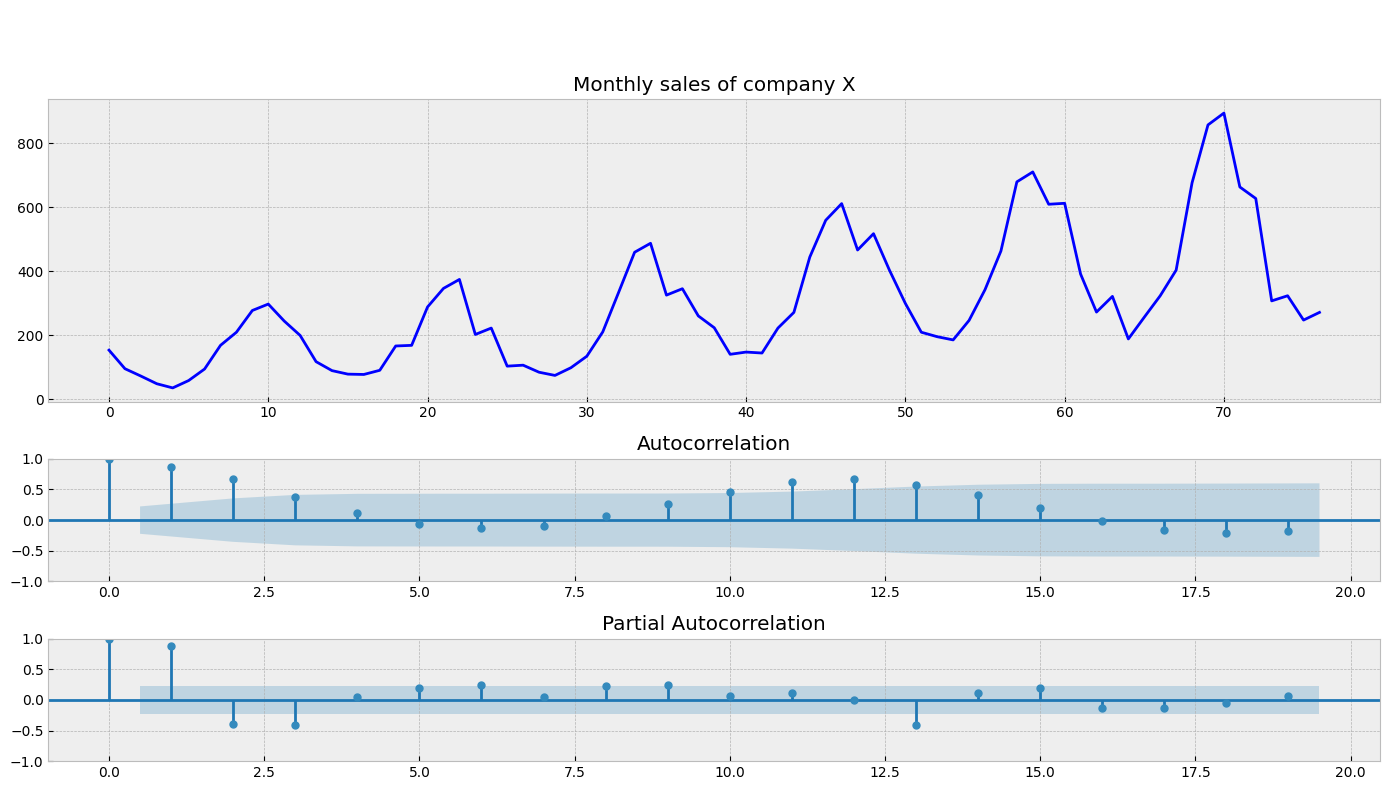

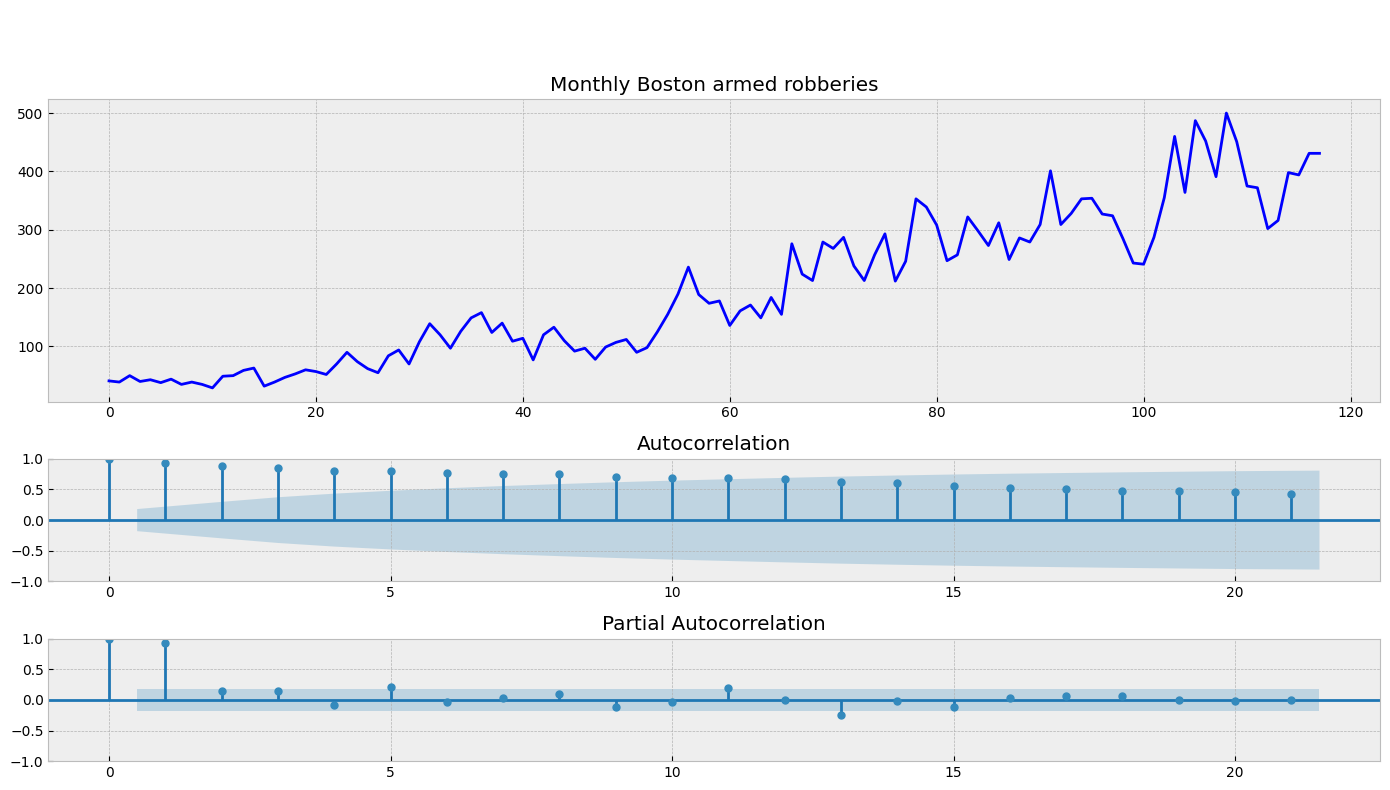

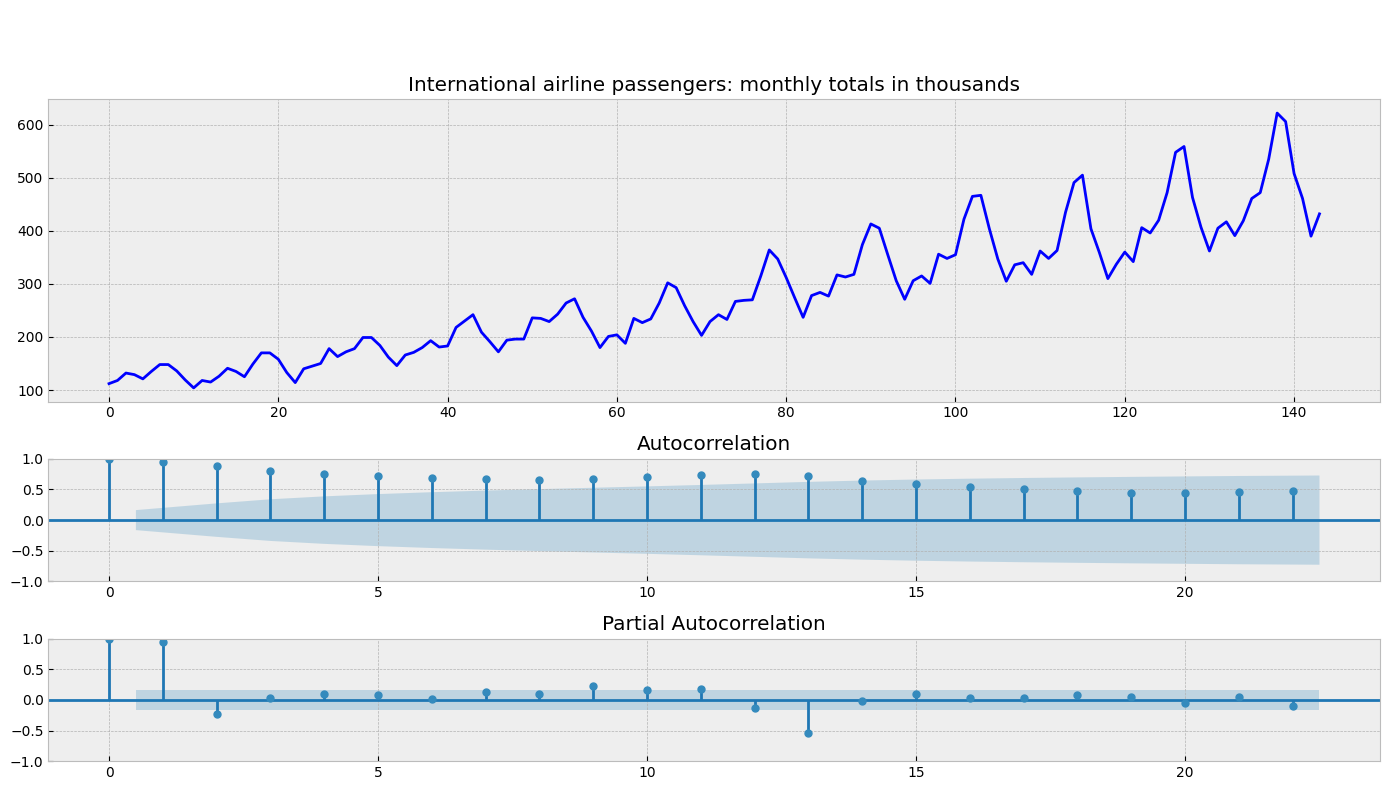

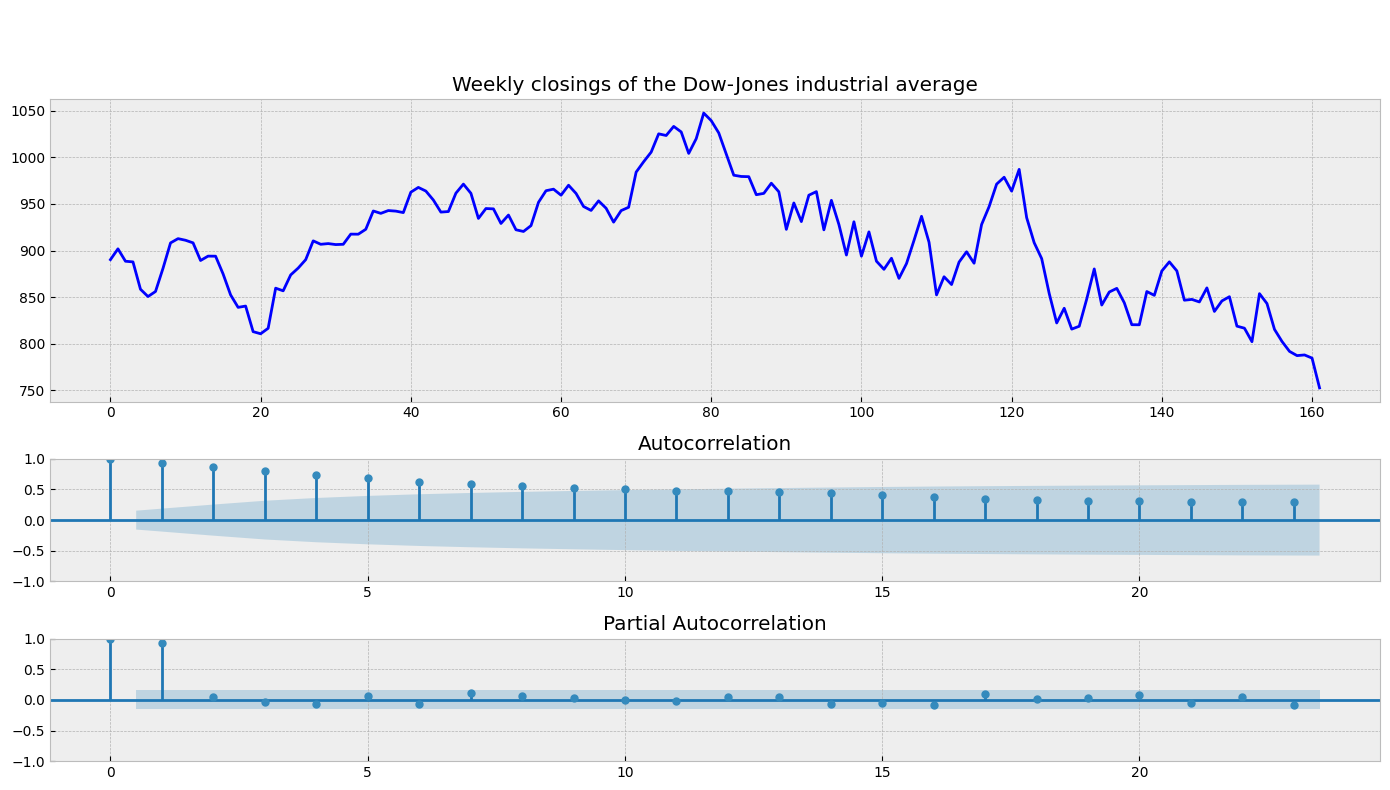

In [61]:
for serie_name, s in all_series.items():
  tsplot(y=s, name=serie_name)

In [63]:
for serie_name, s in all_series.items():
  all_series[serie_name] = boxcox(s, 0)

In [64]:
all_series = stat_test(all_series)

Monthly sales of company X ряд нестационарен
Monthly Boston armed robberies ряд нестационарен
International airline passengers: monthly totals in thousands ряд нестационарен
Weekly closings of the Dow-Jones industrial average ряд нестационарен


In [65]:
for serie_name, s in all_series.items():
  all_series[serie_name] = s[1:] - s[:-1]

In [66]:
all_series = stat_test(all_series)

Monthly sales of company X ряд стационарен
Monthly Boston armed robberies ряд стационарен
International airline passengers: monthly totals in thousands ряд нестационарен
Weekly closings of the Dow-Jones industrial average ряд стационарен


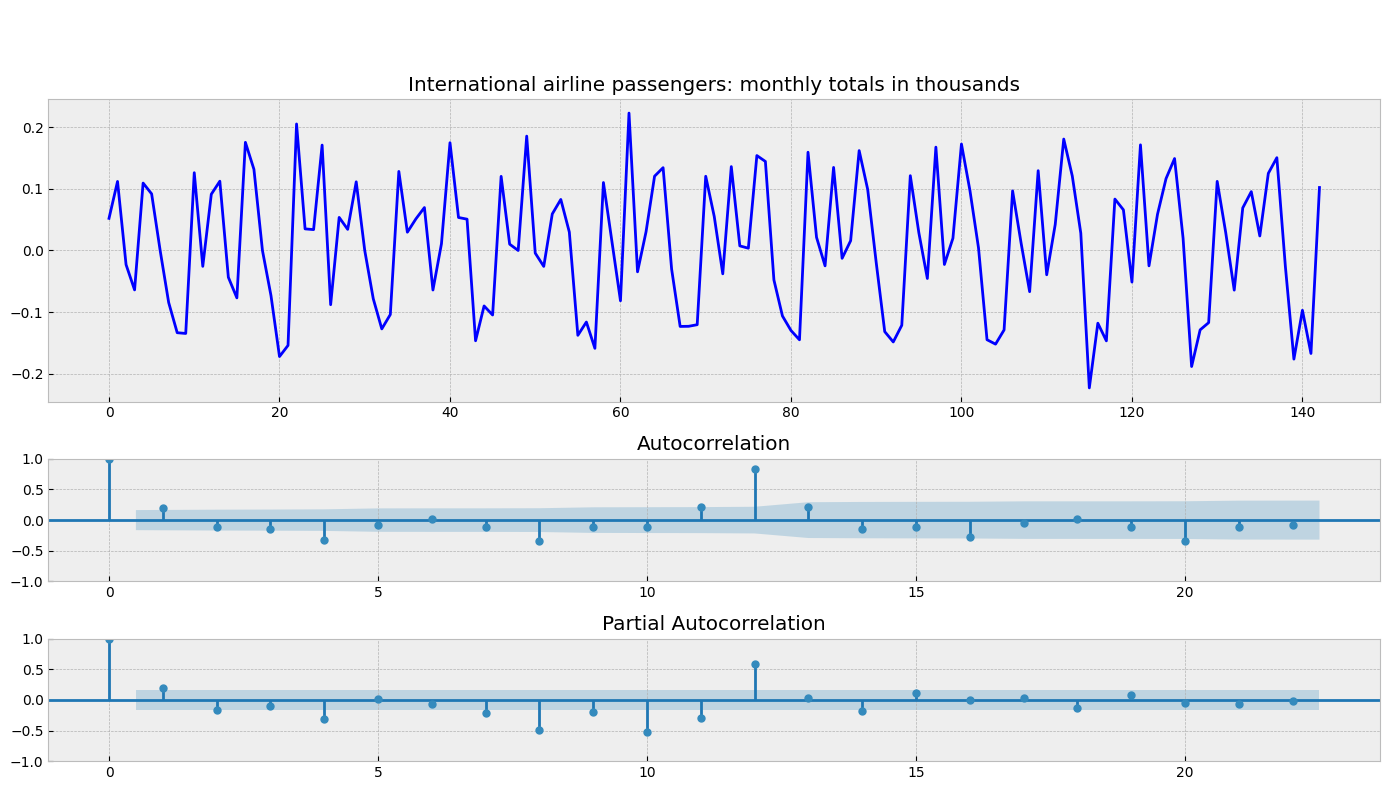

In [67]:
for serie_name, s in all_series.items():
  tsplot(y=s, name=serie_name)

In [68]:
for serie_name, s in all_series.items():
  all_series[serie_name] = s[12:] - s[:-12]

In [69]:
all_series = stat_test(all_series)

International airline passengers: monthly totals in thousands ряд стационарен
